# Autograd

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 课堂练习1

首先，我们创建变量$\mathbf{x}$并为其分配一个初始值。

In [2]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在我们计算$y$关于$\mathbf{x}$的梯度之前，需要一个地方来存储梯度。重要的是，我们不会在每次对一个参数求导时都分配新的内存。因为我们经常会成千上万次地更新相同的参数，每次都分配新的内存可能很快就会将内存耗尽。

In [3]:
x.requires_grad_(True) # 等价于x=torch.arange(4.0,requires_grad=True) 
print(x.grad) # 默认值是None

None


现在计算$y$

In [4]:
y = 2 * torch.dot(x, x)
print(y)

tensor(28., grad_fn=<MulBackward0>)


$\mathbf{x}$是一个长度为4的向量，计算$\mathbf{x}$和$\mathbf{x}$的点积，得到了我们赋值给$y$的标量输出。接下来，通过调用反向传播函数来自动计算$y$关于$\mathbf{x}$每个分量的梯度，并打印这些梯度。

In [5]:
y.backward() 
x.grad

tensor([ 0.,  4.,  8., 12.])

函数$y=2\mathbf{x}^T\mathbf{x}$关于$\mathbf{x}$的梯度应为$4\mathbf{x}$。让我们快速验证这个梯度是否计算正确。

In [6]:
x.grad == 4 * x

tensor([True, True, True, True])

In [7]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 课堂练习2

In [8]:
# Only Tensors of floating point and complex dtype can require gradients
x = torch.tensor([1.0, 2.0])
w = torch.tensor([3.0, 4.0], requires_grad=True)
y = torch.tensor(5.0)

In [9]:
z = (torch.dot(x,w)-y).pow(2)
z

tensor(36., grad_fn=<PowBackward0>)

In [10]:
# 使用自动求导
z.backward()
w.grad

tensor([12., 24.])

In [11]:
2*(torch.dot(x,w)-y)*x

tensor([12., 24.], grad_fn=<MulBackward0>)

## 课堂练习3

In [12]:
x = torch.linspace(0, 10, 100, requires_grad=True)

In [13]:
#backward函数只能对标量的output求梯度
#y = torch.sin(x)
#y.backward()

In [14]:
y = torch.sin(x)
z = y.sum()
z.backward()

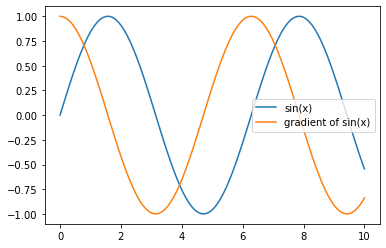

In [15]:
x.requires_grad_(False)
#plt.figure(dpi=300,figsize=(5,3))
plt.plot(x,torch.sin(x),label="sin(x)")
plt.plot(x,x.grad,label="gradient of sin(x)")
plt.legend()
plt.show()

In [16]:
#y = torch.sin(x)
#y.backward(torch.ones_like(x))
#x.grad